### Loading in Data


In [1]:
# import your package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
# set up your API
import quandl
quandl.ApiConfig.api_key = 's-bsuqptLiUnnKtWKKUP'

In [3]:
# get the data on Quandl. 
stocks = ['BAC','CMA','JPM','WFC','TFC','AXP','STT','BK','FITB','BOH','ASB','CMA','CFR','FHN','KEY','MTB','PNC','RF','SNV','USB', 'NDAQ']

# if you get canadian data, you use XTSE or EOD for US stocks
data = {}  # set up the dictionary 
for s in stocks :
    data[s] = quandl.get("EOD/"+s) # for US stocks: quandl.get("EOD/"+s) 

In [4]:
# Create a price and trade volume dataframe
prc = pd.DataFrame()  # where to store the price data
for s in stocks:
    # get the returns
    tmp = data[s][['Close']]  # IMPORTANT: if US stocks, use Adj_Close (includes dividends)
    tmp.columns = [s]  # renaming the column with TICKER name
    prc = pd.concat([prc, tmp], axis=1)
    prc = prc[prc.index.weekday < 5]  # get rid of weekend observations
    


In [5]:
prc = pd.DataFrame(prc)
prc['Date1'] = prc.index
prc = prc[prc['Date1'].between('2008-01-01', '2010-01-01')]



In [6]:
bankprc = prc[['BAC','CMA','JPM','WFC','TFC','AXP','STT','BK','FITB','BOH','ASB','CMA','CFR','FHN','KEY','MTB','PNC','RF','SNV','USB']]
nasdaq = prc[['NDAQ']]
bankprc['Date1'] = bankprc.index
nasdaq['Date1'] = nasdaq.index
bankprc.head()

C:\Users\Rahim\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rahim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,BAC,CMA,CMA,JPM,WFC,TFC,AXP,STT,BK,FITB,...,CMA,CFR,FHN,KEY,MTB,PNC,RF,SNV,USB,Date1
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,40.56,42.75,42.75,42.17,29.10,29.55,51.04,78.88,47.13,24.41,...,42.75,49.11,17.48,22.80,79.98,64.73,23.28,10.80,31.18,2008-01-02
2008-01-03,40.30,41.40,41.40,41.88,28.52,29.12,50.41,85.37,49.17,24.57,...,41.40,48.47,16.75,22.67,78.80,64.00,23.28,11.07,30.33,2008-01-03
2008-01-04,39.85,39.92,39.92,40.93,27.49,27.36,49.14,81.82,48.15,23.78,...,39.92,46.99,16.33,21.84,75.85,62.55,20.80,10.89,29.44,2008-01-04
2008-01-07,39.90,40.55,40.55,41.34,27.68,27.77,49.36,82.39,48.81,23.23,...,40.55,48.24,16.54,22.23,76.50,63.47,20.85,11.15,29.71,2008-01-07
2008-01-08,38.41,38.97,38.97,39.70,26.50,26.88,47.95,81.37,47.00,22.56,...,38.97,46.70,15.51,21.51,72.68,61.48,19.50,10.82,28.44,2008-01-08


In [7]:
nasdaq.head()

,NDAQ,Date1
Date,,
2008-01-02,48.23,2008-01-02
2008-01-03,47.33,2008-01-03
2008-01-04,44.64,2008-01-04
2008-01-07,45.57,2008-01-07
2008-01-08,43.52,2008-01-08


### Graph 1: Mean Bank Price vs NDAQ Price

In [8]:
bankprc['mean'] = bankprc.mean(axis=1)
bankprc.head()


C:\Users\Rahim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,BAC,CMA,CMA,JPM,WFC,TFC,AXP,STT,BK,FITB,...,CFR,FHN,KEY,MTB,PNC,RF,SNV,USB,Date1,mean
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,40.56,42.75,42.75,42.17,29.10,29.55,51.04,78.88,47.13,24.41,...,49.11,17.48,22.80,79.98,64.73,23.28,10.80,31.18,2008-01-02,40.445455
2008-01-03,40.30,41.40,41.40,41.88,28.52,29.12,50.41,85.37,49.17,24.57,...,48.47,16.75,22.67,78.80,64.00,23.28,11.07,30.33,2008-01-03,40.260455
2008-01-04,39.85,39.92,39.92,40.93,27.49,27.36,49.14,81.82,48.15,23.78,...,46.99,16.33,21.84,75.85,62.55,20.80,10.89,29.44,2008-01-04,38.893636
2008-01-07,39.90,40.55,40.55,41.34,27.68,27.77,49.36,82.39,48.81,23.23,...,48.24,16.54,22.23,76.50,63.47,20.85,11.15,29.71,2008-01-07,39.310455
2008-01-08,38.41,38.97,38.97,39.70,26.50,26.88,47.95,81.37,47.00,22.56,...,46.70,15.51,21.51,72.68,61.48,19.50,10.82,28.44,2008-01-08,37.848636


In [30]:
bankprc = pd.merge(bankprc, nasdaq[['NDAQ','Date1']], on=['Date1'], how='left')
bankprc.to_excel('Bank Price Mean Vs NDAQ Data.xlsx')


In [10]:
graph = bankprc[['mean','NDAQ','Date1']]
graph.set_index('Date1', inplace=True)
graph.head(5)


,mean,NDAQ
Date1,,
2008-01-02,40.445455,48.23
2008-01-03,40.260455,47.33
2008-01-04,38.893636,44.64
2008-01-07,39.310455,45.57
2008-01-08,37.848636,43.52


<Figure size 432x288 with 0 Axes>

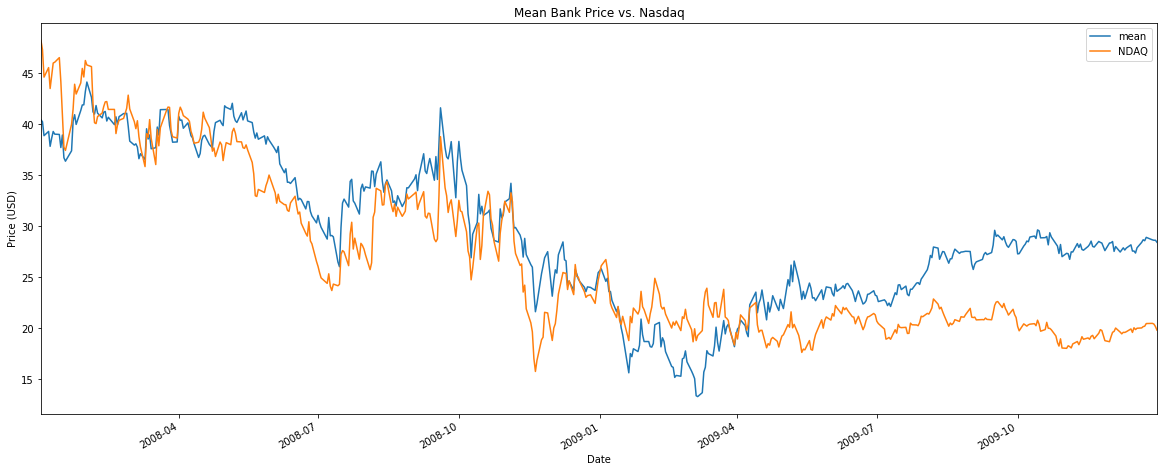

In [11]:
fig = plt.figure()
graph.plot(figsize=(20,8))
plt.title('Mean Bank Price vs. Nasdaq')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.savefig('Banks Mean V NDAQ')


### Graph 2: Mean Bank Price vs S&P Daily Mean

In [12]:
sp = pd.read_excel('NEW-DATA.xlsx', sheet_name='S&P AND DAILY MEAN')
sp.head()

,Date,S&P500,DAILY MEAN
0,2008-01-02,-1.443547,-2.218473
1,2008-01-03,0.000359,-0.561464
2,2008-01-04,-2.455437,-3.493886
3,2008-01-07,0.322485,0.991140
4,2008-01-08,-1.835555,-3.898530


In [13]:
sp['Date1'] = pd.to_datetime(sp['Date'], format='%Y-%m-%d')
sp.head()

,Date,S&P500,DAILY MEAN,Date1
0,2008-01-02,-1.443547,-2.218473,2008-01-02
1,2008-01-03,0.000359,-0.561464,2008-01-03
2,2008-01-04,-2.455437,-3.493886,2008-01-04
3,2008-01-07,0.322485,0.991140,2008-01-07
4,2008-01-08,-1.835555,-3.898530,2008-01-08


In [14]:
sp = sp[['Date1', 'DAILY MEAN']]

sp.head(1)

,Date1,DAILY MEAN
0,2008-01-02,-2.218473


In [15]:
bankprc1 = pd.merge(bankprc, sp[['DAILY MEAN','Date1']], on=['Date1'], how='left')
bankprc1.head()


,BAC,CMA,CMA,JPM,WFC,TFC,AXP,STT,BK,FITB,...,KEY,MTB,PNC,RF,SNV,USB,Date1,mean,NDAQ,DAILY MEAN
0,40.56,42.75,42.75,42.17,29.10,29.55,51.04,78.88,47.13,24.41,...,22.80,79.98,64.73,23.28,10.80,31.18,2008-01-02,40.445455,48.23,-2.218473
1,40.30,41.40,41.40,41.88,28.52,29.12,50.41,85.37,49.17,24.57,...,22.67,78.80,64.00,23.28,11.07,30.33,2008-01-03,40.260455,47.33,-0.561464
2,39.85,39.92,39.92,40.93,27.49,27.36,49.14,81.82,48.15,23.78,...,21.84,75.85,62.55,20.80,10.89,29.44,2008-01-04,38.893636,44.64,-3.493886
3,39.90,40.55,40.55,41.34,27.68,27.77,49.36,82.39,48.81,23.23,...,22.23,76.50,63.47,20.85,11.15,29.71,2008-01-07,39.310455,45.57,0.991140
4,38.41,38.97,38.97,39.70,26.50,26.88,47.95,81.37,47.00,22.56,...,21.51,72.68,61.48,19.50,10.82,28.44,2008-01-08,37.848636,43.52,-3.898530


In [16]:
graph2 = bankprc1[['mean','DAILY MEAN','Date1']]
graph2.set_index('Date1', inplace=True)
graph2.head(5)


,mean,DAILY MEAN
Date1,,
2008-01-02,40.445455,-2.218473
2008-01-03,40.260455,-0.561464
2008-01-04,38.893636,-3.493886
2008-01-07,39.310455,0.991140
2008-01-08,37.848636,-3.898530


<Figure size 432x288 with 0 Axes>

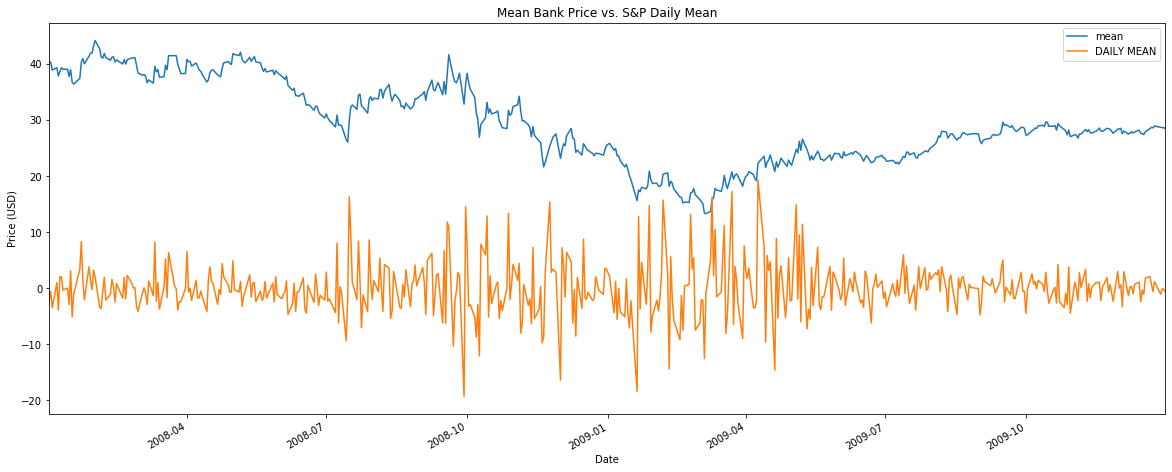

In [17]:
fig = plt.figure()
graph2.plot(figsize=(20,8))
plt.title('Mean Bank Price vs. S&P Daily Mean')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.savefig('Banks Mean V S&P Daily Mean')


### Graph 3: Mean Bank Return Vs NDAQ Return

In [18]:
bankreturns = prc[['BAC','CMA','JPM','WFC','TFC','AXP','STT','BK','FITB','BOH','ASB','CMA','CFR','FHN','KEY','MTB','PNC','RF','SNV','USB']]
bankreturns = bankreturns.pct_change(1)
bankreturns.head()


,BAC,CMA,CMA,JPM,WFC,TFC,AXP,STT,BK,FITB,...,CMA,CMA,CFR,FHN,KEY,MTB,PNC,RF,SNV,USB
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,-0.006410,-0.031579,-0.031579,-0.006877,-0.019931,-0.014552,-0.012343,0.082277,0.043285,0.006555,...,-0.031579,-0.031579,-0.013032,-0.041762,-0.005702,-0.014754,-0.011278,0.000000,0.025000,-0.027261
2008-01-04,-0.011166,-0.035749,-0.035749,-0.022684,-0.036115,-0.060440,-0.025193,-0.041584,-0.020744,-0.032153,...,-0.035749,-0.035749,-0.030534,-0.025075,-0.036612,-0.037437,-0.022656,-0.106529,-0.016260,-0.029344
2008-01-07,0.001255,0.015782,0.015782,0.010017,0.006912,0.014985,0.004477,0.006967,0.013707,-0.023129,...,0.015782,0.015782,0.026601,0.012860,0.017857,0.008570,0.014708,0.002404,0.023875,0.009171
2008-01-08,-0.037343,-0.038964,-0.038964,-0.039671,-0.042630,-0.032049,-0.028566,-0.012380,-0.037083,-0.028842,...,-0.038964,-0.038964,-0.031924,-0.062273,-0.032389,-0.049935,-0.031353,-0.064748,-0.029596,-0.042747


In [19]:
bankreturns['Date1'] = bankreturns.index

In [20]:
bankreturns['Average Return'] = bankreturns.mean(axis=1)

In [21]:
nasdaqreturns = nasdaq[['NDAQ']]
nasdaqreturns= nasdaqreturns.pct_change(1)
nasdaqreturns['Date1'] = nasdaqreturns.index
nasdaqreturns.head()

,NDAQ,Date1
Date,,
2008-01-02,NaN,2008-01-02
2008-01-03,-0.018661,2008-01-03
2008-01-04,-0.056835,2008-01-04
2008-01-07,0.020833,2008-01-07
2008-01-08,-0.044986,2008-01-08


In [22]:
bankreturns = pd.merge(bankreturns, nasdaqreturns[['NDAQ','Date1']], on=['Date1'], how='left')
bankreturns.head()


,BAC,CMA,CMA,JPM,WFC,TFC,AXP,STT,BK,FITB,...,FHN,KEY,MTB,PNC,RF,SNV,USB,Date1,Average Return,NDAQ
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-02,NaN,NaN
1,-0.006410,-0.031579,-0.031579,-0.006877,-0.019931,-0.014552,-0.012343,0.082277,0.043285,0.006555,...,-0.041762,-0.005702,-0.014754,-0.011278,0.000000,0.025000,-0.027261,2008-01-03,-0.007975,-0.018661
2,-0.011166,-0.035749,-0.035749,-0.022684,-0.036115,-0.060440,-0.025193,-0.041584,-0.020744,-0.032153,...,-0.025075,-0.036612,-0.037437,-0.022656,-0.106529,-0.016260,-0.029344,2008-01-04,-0.035012,-0.056835
3,0.001255,0.015782,0.015782,0.010017,0.006912,0.014985,0.004477,0.006967,0.013707,-0.023129,...,0.012860,0.017857,0.008570,0.014708,0.002404,0.023875,0.009171,2008-01-07,0.010445,0.020833
4,-0.037343,-0.038964,-0.038964,-0.039671,-0.042630,-0.032049,-0.028566,-0.012380,-0.037083,-0.028842,...,-0.062273,-0.032389,-0.049935,-0.031353,-0.064748,-0.029596,-0.042747,2008-01-08,-0.038983,-0.044986


In [23]:
graph3 = bankreturns[['Average Return','NDAQ','Date1']]
graph3.set_index('Date1', inplace=True)
graph3.head(5)


,Average Return,NDAQ
Date1,,
2008-01-02,NaN,NaN
2008-01-03,-0.007975,-0.018661
2008-01-04,-0.035012,-0.056835
2008-01-07,0.010445,0.020833
2008-01-08,-0.038983,-0.044986


<Figure size 432x288 with 0 Axes>

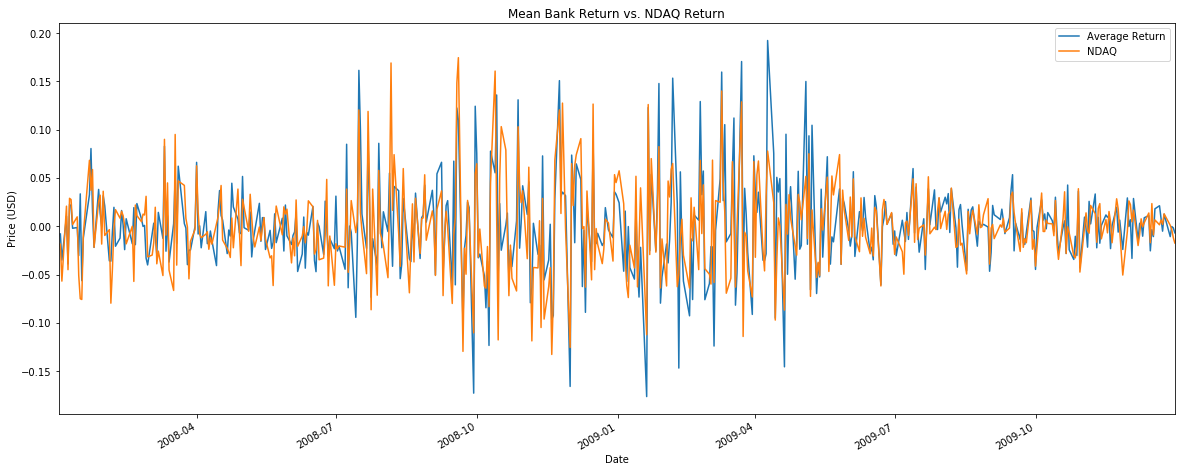

In [24]:
fig = plt.figure()
graph3.plot(figsize=(20,8))
plt.title('Mean Bank Return vs. NDAQ Return')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.savefig('Banks Returns V NDAQ Mean')


### Graph 4: Bank Return Vs S&P Daily Mean

In [25]:
bankreturns.head()

,BAC,CMA,CMA,JPM,WFC,TFC,AXP,STT,BK,FITB,...,FHN,KEY,MTB,PNC,RF,SNV,USB,Date1,Average Return,NDAQ
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-02,NaN,NaN
1,-0.006410,-0.031579,-0.031579,-0.006877,-0.019931,-0.014552,-0.012343,0.082277,0.043285,0.006555,...,-0.041762,-0.005702,-0.014754,-0.011278,0.000000,0.025000,-0.027261,2008-01-03,-0.007975,-0.018661
2,-0.011166,-0.035749,-0.035749,-0.022684,-0.036115,-0.060440,-0.025193,-0.041584,-0.020744,-0.032153,...,-0.025075,-0.036612,-0.037437,-0.022656,-0.106529,-0.016260,-0.029344,2008-01-04,-0.035012,-0.056835
3,0.001255,0.015782,0.015782,0.010017,0.006912,0.014985,0.004477,0.006967,0.013707,-0.023129,...,0.012860,0.017857,0.008570,0.014708,0.002404,0.023875,0.009171,2008-01-07,0.010445,0.020833
4,-0.037343,-0.038964,-0.038964,-0.039671,-0.042630,-0.032049,-0.028566,-0.012380,-0.037083,-0.028842,...,-0.062273,-0.032389,-0.049935,-0.031353,-0.064748,-0.029596,-0.042747,2008-01-08,-0.038983,-0.044986


In [26]:
sp

,Date1,DAILY MEAN
0,2008-01-02,-2.218473
1,2008-01-03,-0.561464
2,2008-01-04,-3.493886
3,2008-01-07,0.991140
4,2008-01-08,-3.898530
...,...,...
752,2010-12-27,0.804578
753,2010-12-28,0.461213
754,2010-12-29,-0.206655
755,2010-12-30,-0.525002


In [27]:
bankreturns = pd.merge(bankreturns, sp[['DAILY MEAN','Date1']], on=['Date1'], how='left')
bankreturns.head()


,BAC,CMA,CMA,JPM,WFC,TFC,AXP,STT,BK,FITB,...,KEY,MTB,PNC,RF,SNV,USB,Date1,Average Return,NDAQ,DAILY MEAN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-02,NaN,NaN,-2.218473
1,-0.006410,-0.031579,-0.031579,-0.006877,-0.019931,-0.014552,-0.012343,0.082277,0.043285,0.006555,...,-0.005702,-0.014754,-0.011278,0.000000,0.025000,-0.027261,2008-01-03,-0.007975,-0.018661,-0.561464
2,-0.011166,-0.035749,-0.035749,-0.022684,-0.036115,-0.060440,-0.025193,-0.041584,-0.020744,-0.032153,...,-0.036612,-0.037437,-0.022656,-0.106529,-0.016260,-0.029344,2008-01-04,-0.035012,-0.056835,-3.493886
3,0.001255,0.015782,0.015782,0.010017,0.006912,0.014985,0.004477,0.006967,0.013707,-0.023129,...,0.017857,0.008570,0.014708,0.002404,0.023875,0.009171,2008-01-07,0.010445,0.020833,0.991140
4,-0.037343,-0.038964,-0.038964,-0.039671,-0.042630,-0.032049,-0.028566,-0.012380,-0.037083,-0.028842,...,-0.032389,-0.049935,-0.031353,-0.064748,-0.029596,-0.042747,2008-01-08,-0.038983,-0.044986,-3.898530


In [28]:
graph4 = bankreturns[['Average Return','DAILY MEAN','Date1']]
graph4.set_index('Date1', inplace=True)
graph4.head(5)


,Average Return,DAILY MEAN
Date1,,
2008-01-02,NaN,-2.218473
2008-01-03,-0.007975,-0.561464
2008-01-04,-0.035012,-3.493886
2008-01-07,0.010445,0.991140
2008-01-08,-0.038983,-3.898530


<Figure size 432x288 with 0 Axes>

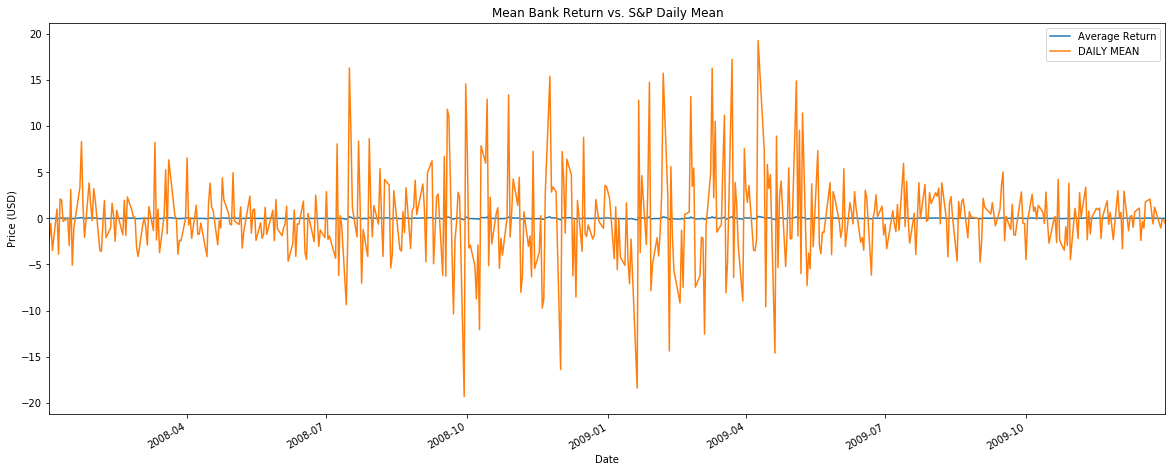

In [29]:
fig = plt.figure()
graph4.plot(figsize=(20,8))
plt.title('Mean Bank Return vs. S&P Daily Mean')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.savefig('Banks Returns V S&P Daily Mean')
